<a href="https://colab.research.google.com/github/visualnnz/2025-1_ComputerVision/blob/main/homework/CV_HW_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HW#2
라이브러리 import 및 이미지 파일 다운로드


In [4]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

from google.colab.patches import cv2_imshow

In [2]:
!wget "https://raw.githubusercontent.com/kjcheoi-class/CV/main/Fig0309(a)(washed_out_aerial_image).tif" # HW#2-1
!wget "https://raw.githubusercontent.com/kjcheoi-class/CV/main/Fig0310(b)(washed_out_pollen_image).tif" # HW#2-2
!wget "https://raw.githubusercontent.com/visualnnz/2025-1_ComputerVision/main/image/praying_otter.jpg" # HW#2-3
!wget "https://raw.githubusercontent.com/kjcheoi-class/CV/main/school.jpg" # HW#2-4
!wget "https://raw.githubusercontent.com/kjcheoi-class/CV/main/finger.jpg" # HW#2-5
!wget "https://raw.githubusercontent.com/kjcheoi-class/CV/main/Fig0905(a)(wirebond-mask).tif" # HW#2-6
!wget "https://raw.githubusercontent.com/kjcheoi-class/CV/main/Fig0939(a)(headCT-Vandy).tif" # HW#2-7
!wget "https://raw.githubusercontent.com/kjcheoi-class/CV/main/Fig0938(a)(cygnusloop_Xray_original).tif" # HW#2-8
!wget "https://raw.githubusercontent.com/kjcheoi-class/CV/main/Fig0940(a)(rice_image_with_intensity_gradient).tif" # HW#2-9
!wget "https://raw.githubusercontent.com/kjcheoi-class/CV/main/Fig0943(a)(dark_blobs_on_light_background).tif" # HW#2-10

--2025-04-13 09:14:51--  https://raw.githubusercontent.com/kjcheoi-class/CV/main/Fig0309(a)(washed_out_aerial_image).tif
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 589115 (575K) [image/tiff]
Saving to: ‘Fig0309(a)(washed_out_aerial_image).tif’

Fig0309(a)(washed_o 100%[===================>] 575.31K  --.-KB/s    in 0.04s   

2025-04-13 09:14:51 (15.0 MB/s) - ‘Fig0309(a)(washed_out_aerial_image).tif’ saved [589115/589115]

--2025-04-13 09:14:51--  https://raw.githubusercontent.com/kjcheoi-class/CV/main/Fig0310(b)(washed_out_pollen_image).tif
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... con

# HW#2-1

## 개요
아래의 이미지들은 감마 보정(gamma correction) 기법을 통해 이미지를 보정한 것으로, 1보다 큰 수를 감마(γ) 값으로 적용함으로써 이미지의 전체적인 명암을 감소시켰다.

### 이미지 번호 순서
a b
<br>
c d

## a (좌측 상단)
전체적으로 화소의 값이 높아 쨍한 느낌을 자아내는 원본 이미지(감마 값: 1.0)
<br>
<br>

## b (우측 상단)
이미지 a보다 높은 감마 값을 적용함으로써 원본 이미지보다 어두운 느낌을 자아냈다. (감마 값: 2.5)
<br>
<br>

## c (좌측 하단)
감마 값: 4.0
<br>
<br>

## d (우측 하단)
감마 값: 5.0

--2025-04-12 12:43:07--  https://raw.githubusercontent.com/kjcheoi-class/CV/main/Fig0309(a)(washed_out_aerial_image).tif
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 589115 (575K) [image/tiff]
Saving to: ‘Fig0309(a)(washed_out_aerial_image).tif.1’

Fig0309(a)(washed_o 100%[===================>] 575.31K  --.-KB/s    in 0.009s  

2025-04-12 12:43:07 (63.5 MB/s) - ‘Fig0309(a)(washed_out_aerial_image).tif.1’ saved [589115/589115]



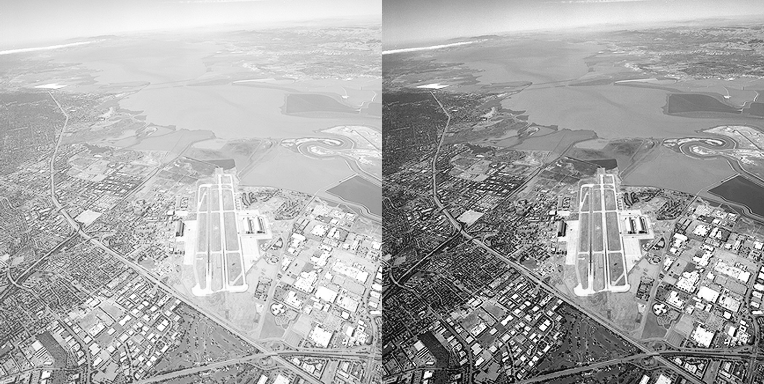

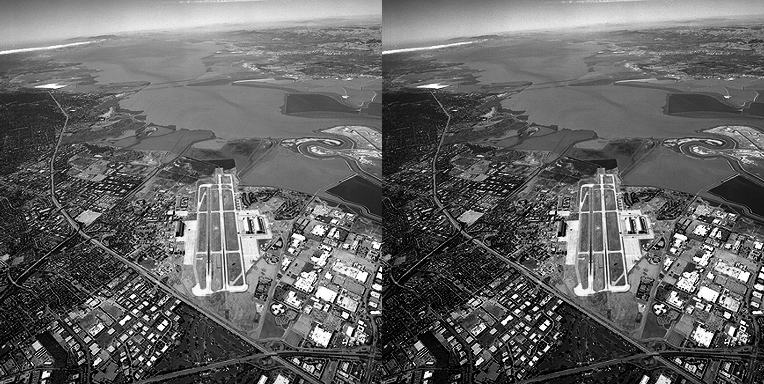

In [ ]:
img = cv.imread('Fig0309(a)(washed_out_aerial_image).tif')
img = cv.resize(img, dsize = (0, 0), fx = 0.5, fy = 0.5)

def gamma(f, gamma = 1.0):
    f1 = f / 255.0
    return np.uint8(255 * (f1 ** gamma))

gc1 = np.hstack((gamma(img, 1.0), gamma(img, 2.5)))
gc2 = np.hstack((gamma(img, 4.0), gamma(img, 5.0)))

cv2_imshow(gc1)
cv2_imshow(gc2)

# HW#2-2

## 개요
아래의 이미지들은 명암 대비효과가 더욱 두드러지게 처리된 이미지들이다.

### 이미지 번호 순서
a
<br>
b
<br>
c

## 이미지 a
명암 대비효과가 약한 원본 이미지

## 이미지 b
contrastStretching 함수를 통해 명암 대비효과를 더욱 두드러지게 처리한 명암의 범위가 [0, 255]인 그레이스케일의 이미지

## 이미지 c
threshold 함수를 통해 Otsu 알고리즘을 적용하여 명암을 이진화하여 명암 대비효과를 두드러지게 처리한 이미지

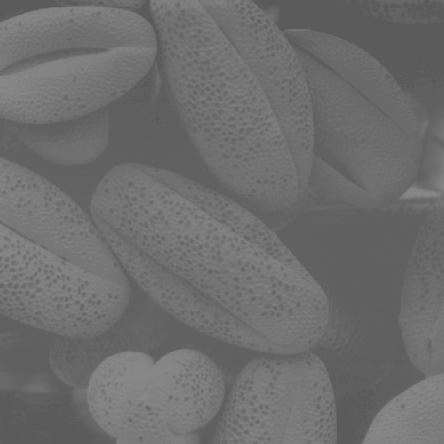

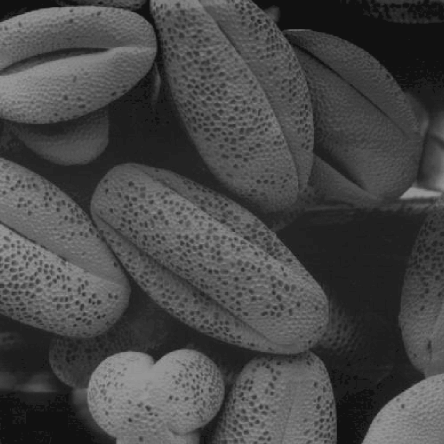

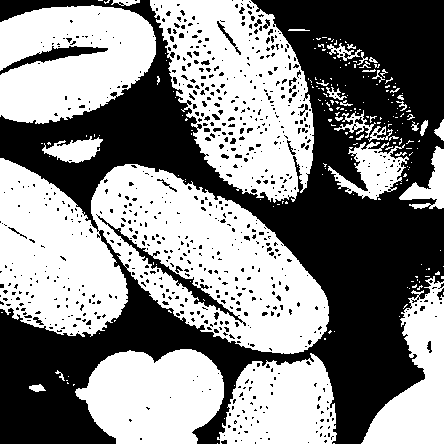

In [ ]:
img = cv.imread('Fig0310(b)(washed_out_pollen_image).tif')
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
img_gray = cv.resize(img_gray, dsize = (0, 0), fx = 0.5, fy = 0.5)

def contrastStretching(intensity_level):
    if ((intensity_level > 256 * (3 / 8)).any() and (intensity_level < 256 * (5 / 8)).any()):
        return np.uint8(256 * (1 / 8) + (intensity_level - (256 * (3 / 8))) * 3)
    elif ((intensity_level < 256 * (3 / 8)).any()):
        return np.uint8(intensity_level * (1 / 3))
    else:
        return np.uint8(256 * (7 / 8) + (intensity_level - (256 * (5 / 8))) * (1 / 3))

result_img1 = contrastStretching(img_gray)
_, result_img2 = cv.threshold(img_gray, thresh=0, maxval=255, type=cv.THRESH_BINARY + cv.THRESH_OTSU)

cv2_imshow(img_gray)
cv2_imshow(result_img1)
cv2_imshow(result_img2)

# HW#2-3

## 개요
아래의 이미지들은 스무딩 필터, 샤프닝 필터, 엠보싱 필터가 적용된 이미지들이다.

## 이미지 번호 순서
a
<br>
b
<br>
c

## 이미지 a
왼쪽 이미지는 3 x 3 박스 블러(평균 블러)처리된 이미지이며 오른쪽 이미지는 5 x 5 가우시안 블러 처리된 이미지이다. 오른쪽 이미지의 경우 필터의 크기가 더 크기 때문에 왼쪽 이미지보다 좀 더 뿌연 효과를 자아낸다.

## 이미지 b
오른쪽 이미지에 적용된 샤프닝 필터의 경우, 왼쪽 이미지에 적용된 샤프닝 필터보다 필터 중심부와 주변부의 값 차이가 더욱 크기 때문에 오른쪽 이미지가 왼쪽 이미지보다 엣지를 더욱 두드러지게 보이도록 처리되었다.

## 이미지 c
오른쪽 이미지에 적용된 엠보싱 필터의 경우, 왼쪽 이미지에 적용된 샤프닝 필터보다 좌측 상단에 -1로 된 값이 더 많고 우측 하단에 1로된 값이 더 많기 때문에 오른쪽 이미지가 왼쪽 이미지보다 더욱 선명한 엠보싱 효과가 적용되었다.


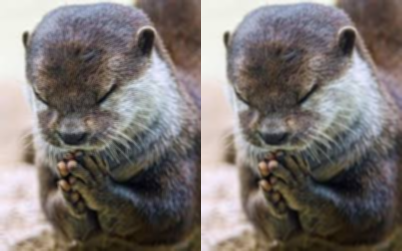

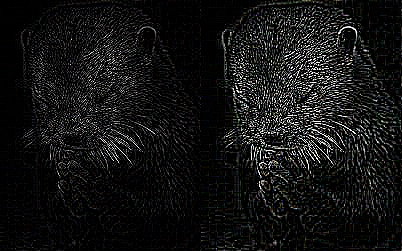

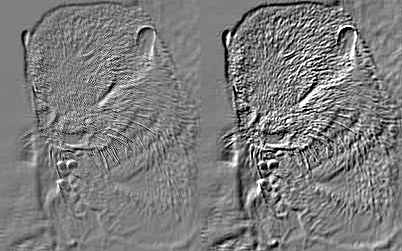

In [ ]:
img = cv.imread('praying_otter.jpg')
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
blur = cv.blur(img, ksize= (3, 3))
gaussianBlur = cv.GaussianBlur(img, ksize= (5, 5), sigmaX = 0)

sharpeningFilter1 = np.array(
    [[0, -1, 0],
    [-1, 4, -1],
    [0, -1, 0]]
    )

sharpeningFilter2 = np.array(
    [[-1, -1, -1],
    [-1, 8, -1],
    [-1, -1, -1]]
)

embossingFilter1 = np.array(
    [[-1, 0, 0],
     [0, 0, 0],
     [0, 0, 1]]
)

embossingFilter2 = np.array(
    [[-1, -1, 0],
     [-1, 0, 1],
     [0, 1, 1]]
)

sharpened1 = cv.filter2D(img, -1, sharpeningFilter1)
sharpened2 = cv.filter2D(img, -1, sharpeningFilter2)

gray16 = np.int16(img_gray)
embossed1 = np.uint8(np.clip(cv.filter2D(gray16, -1, embossingFilter1) + 128, 0, 255))
embossed2 = np.uint8(np.clip(cv.filter2D(gray16, -1, embossingFilter2) + 128, 0, 255))

smoothing = np.hstack((blur, gaussianBlur))
sharpened = np.hstack((sharpened1, sharpened2))
embossed = np.hstack((embossed1, embossed2))

cv2_imshow(smoothing)
cv2_imshow(sharpened)
cv2_imshow(embossed)

# HW#2-4

## 개요
아래의 이미지들은 Sobel 연산자를 변형하여 대각선 방향으로 edge를 검출한 이미지이다.

## 이미지 번호 순서
a b

## 이미지 a
+45도 방향의 대각선 edge를 검출한 이미지이다. 하지만 +45도 방향의 성분에는 +x 방향과 +y 방향 성분이 있기 때문에 수평과 수직 edge도 약하게 검출되었다.

## 이미지 b
-45도 방향의 대각선 edge를 검출한 이미지이다. 이미지 a와 마찬가지로 -45도 방향의 성분에는 +x 방향과 -y 방향 성분이 있기 때문에 수평과 수직 edge도 약하게 검출되었다.


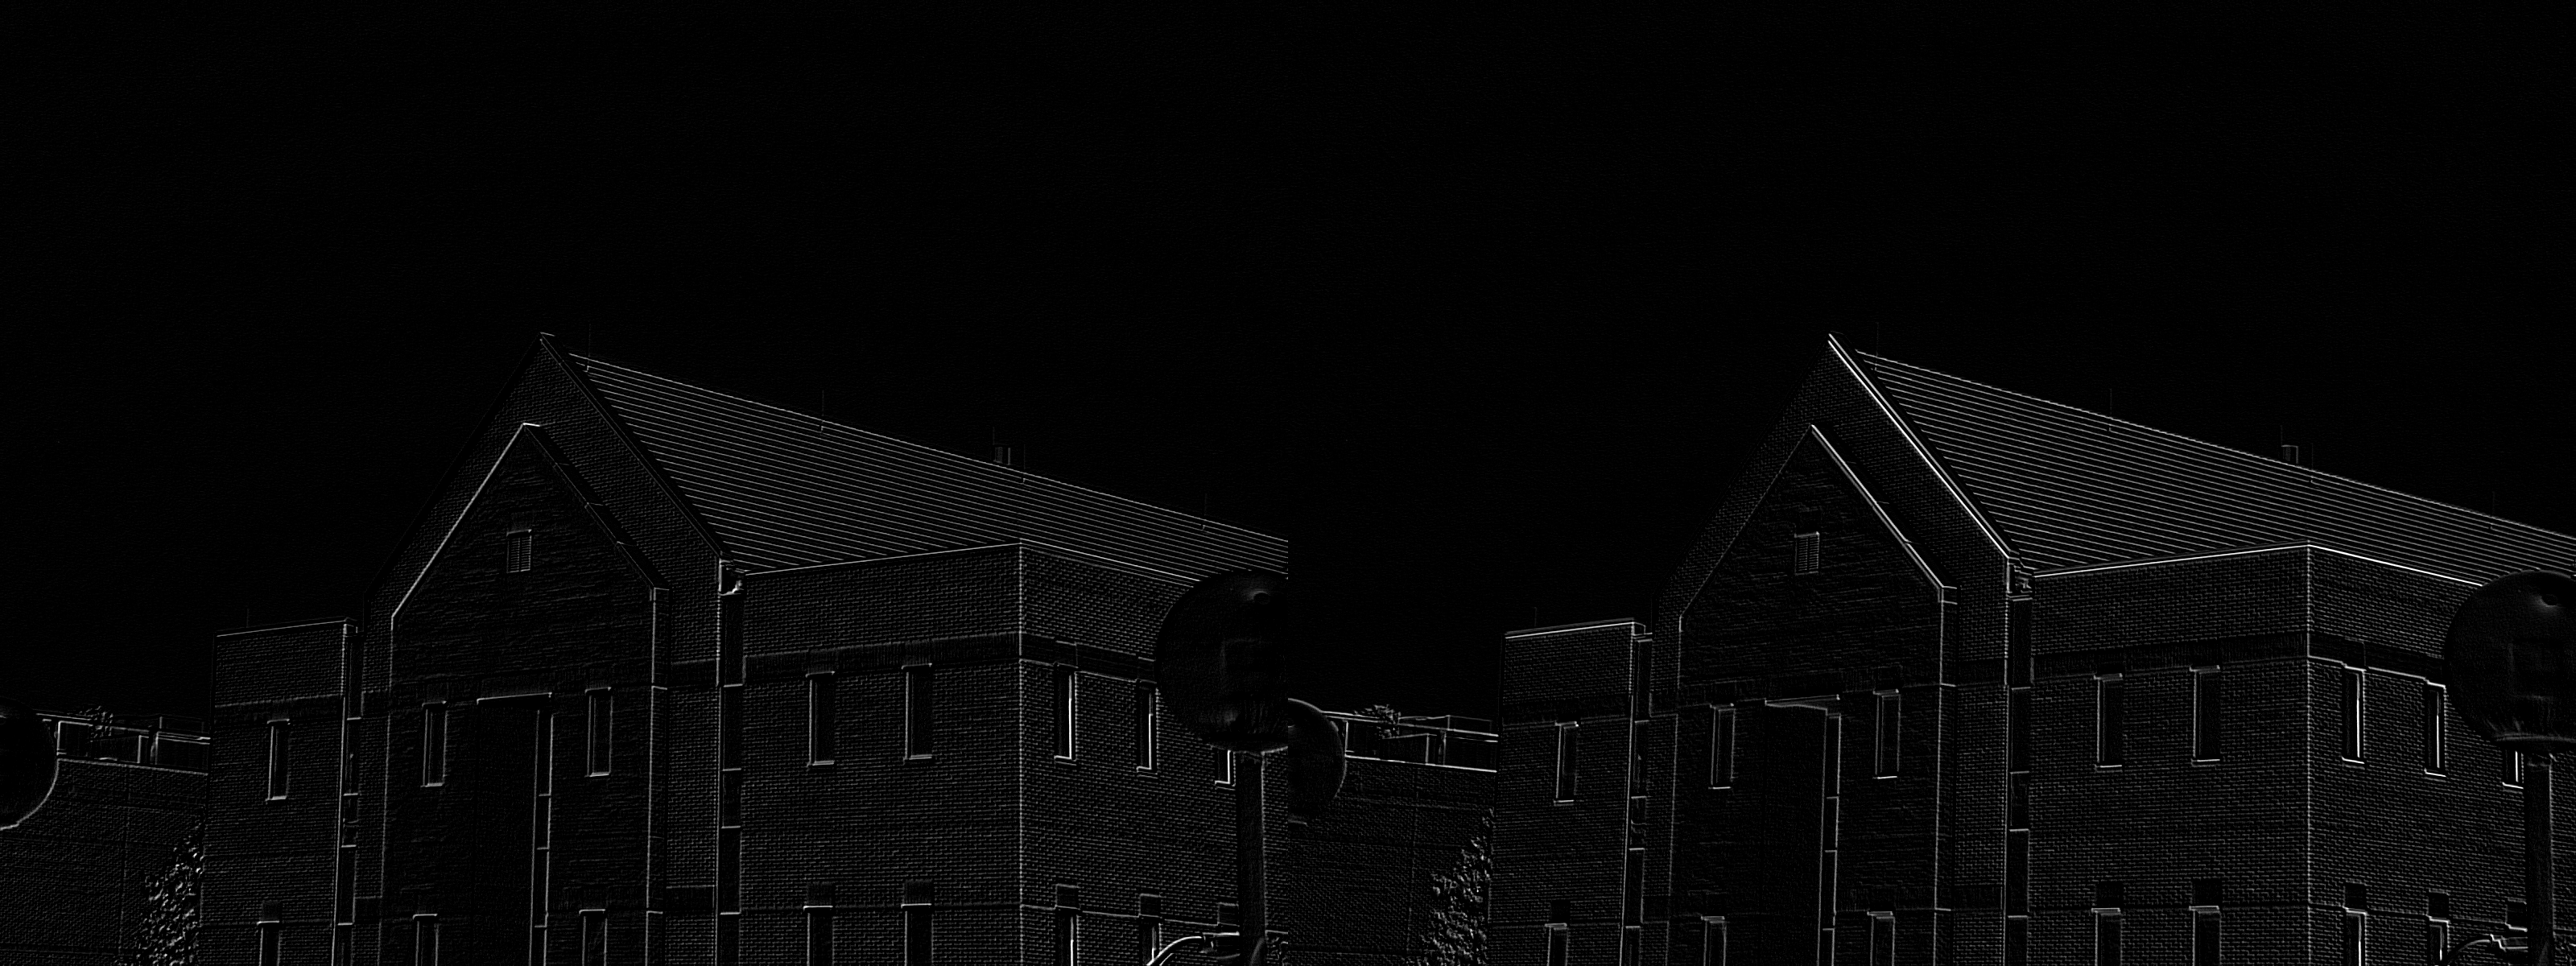

In [ ]:
img = cv.imread('school.jpg')
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

sobel_45 = np.array(
    [[-2, 0, 0],
     [0, 0, 0],
     [0, 0, 2]], dtype = np.float32
)

sobel_minus_45 = np.array(
    [[0, 0, 2],
     [0, 0, 0],
     [-2, 0, 0]], dtype = np.float32
)

edge_45 = cv.filter2D(img_gray, -1, sobel_45)
edge_minus_45 = cv.filter2D(img_gray, -1, sobel_minus_45)

sobel = np.hstack((edge_45, edge_minus_45))

cv2_imshow(sobel)

# HW#2-5

## 개요
아래의 이미지는 모폴로지 연산을 통해 원본 이미지의 노이즈인 하얀 점들을 제거한 이미지이다.

## 이미지 분석
오른쪽의 이미지는 왼쪽의 원본 이미지에서 opening 연산(erosion + dilation) 후 closing 연산(dilation + erosion) 연산을 통해 노이즈를 제거한 다음 지문의 원본 크기로 복원하고 지문을 팽창하고 침식시킴으로써 지문 내부에 있는 작은 구멍들을 제거하고 원본 크기로 복원하여 지문 내부 외부의 노이즈를 제거한 깔끔한 이미지로 처리되었다.

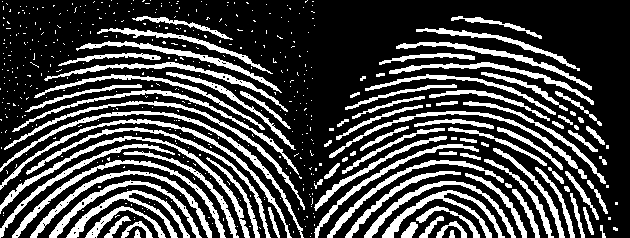

In [ ]:
img = cv.imread('finger.jpg')

se = cv.getStructuringElement(cv.MORPH_RECT, (3, 3))

opening = cv.dilate(cv.erode(img, se, iterations= 1), se, iterations= 1)
result_img = cv.erode(cv.dilate(opening, se, iterations= 1), se, iterations= 1)

cv2_imshow(np.hstack((img, result_img)))

# HW#2-6

## 이미지 분석
15 x 15 크기의 배열에 배열 값이 모두 1인 정사각형 Structure Element로 erosion 연산을 함으로써 왼쪽 이미지에서 중앙의 사각형에 연결되어있는 선분들을 없애서 오른쪽의 이미지와 같은 결과가 나오게 하였다.

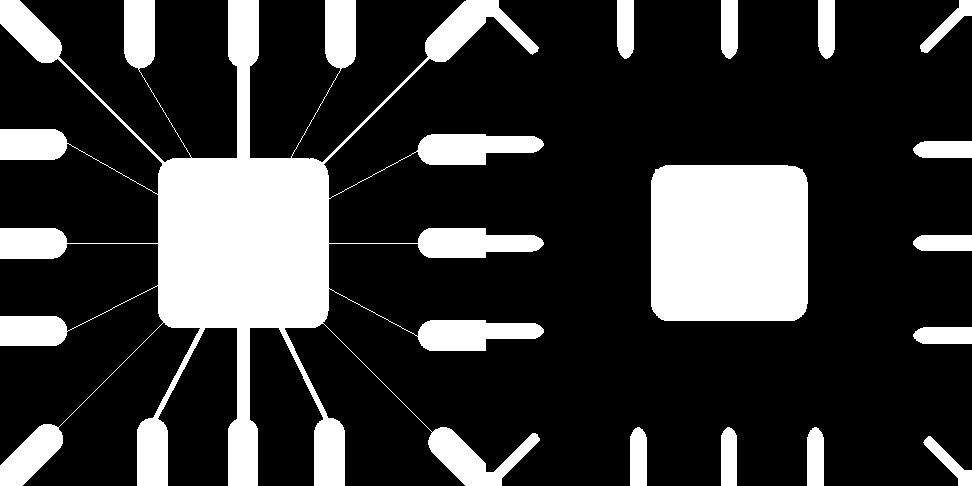

In [ ]:
img = cv.imread('Fig0905(a)(wirebond-mask).tif')

se = cv.getStructuringElement(cv.MORPH_RECT, (15, 15))

erosion = cv.erode(img, se, iterations= 1)

cv2_imshow(np.hstack((img, erosion)))

# HW#2-7

## 개요
아래의 이미지들은 Edge 검출 알고리즘들을 사용하여 edge를 검출한 이미지들이다.

## 이미지 번호 순서
a
<br>
b
<br>
c
<br>
d
<br>
e

## 이미지 a
Edge 검출 알고리즘을 통해 edge를 검출한 이미지와 비교하기 위한 원본 이미지

## 이미지 b
Sobel 필터를 통해 edge를 검출한 이미지이다. 왼쪽 이미지는 x방향 미분을 통해 수직 edge를 검출한 이미지이며 오른쪽 이미지는 y방향 미분을 통해 수평 edge를 검출한 이미지이다.

## 이미지 c
Laplacian 필터를 통해 edge를 검출한 이미지이다. Sobel 필터를 통한 edge 검출은 1차 미분을 활용하기 때문에 edge 부근에서 edge를 검출하는 반면, Laplacian 필터를 통한 edge 검출은 2차 미분을 통해 영교차 지점을 edge로 간주하기 때문에 edge의 중심 부분을 찾아서 이미지의 edge를 검출한다.

## 이미지 d
Canny Edge 검출 알고리즘은 Laplacian 필터 방식을 개선한 알고리즘이다. 따라서
Canny Edge 검출기는 edge 검출에 있어서 Sobel 필터나 Laplacian 필터를 적용한 것보다 좋은 성능을 보인다.

## 이미지 e
Mophological Edge Detection은 팽창 연산과 침식 연산 수행한 결과의 차 연산으로,
Canny Edge Detection과 달리 edge 내부의 이미지도 보존하면서 edge를 검출한다.

In [1]:
img = cv.imread('Fig0939(a)(headCT-Vandy).tif')

sobel_x = cv.Sobel(img, cv.CV_32F, 1, 0, ksize= 3)
sobel_y = cv.Sobel(img, cv.CV_32F, 0, 1, ksize= 3)

laplacian = cv.Laplacian(img, cv.CV_32F, ksize= 3)

canny = cv.Canny(img, 100, 200)

se = cv.getStructuringElement(cv.MORPH_CROSS, (3, 3))

mophological_gradient = cv.dilate(img, se, iterations= 1) - cv.erode(img, se, iterations= 1)

cv2_imshow(img)
cv2_imshow(np.hstack((sobel_x, sobel_y)))
cv2_imshow(laplacian)
cv2_imshow(canny)
cv2_imshow(mophological_gradient)

NameError: name 'cv' is not defined

# HW#2-8

## 이미지 번호 순서
a
<br>
b
<br>
c

## 이미지 a
원본 이미지

## 이미지 b
Structuring Element를 5 x 5크기의 Disk 모양으로 하여 Morphological Smoothing 연산을 한 결과 중앙의 메인 객체 외에 메인 객체 부근에 있는 자잘한 노이즈들이 많이 제거되었다.

## 이미지 c
가우시안 블러를 통해 Smoothing Filter를 적용한 결과 노이즈들이 뿌옇게 되기만 할 뿐 제거가 되지는 않았다.

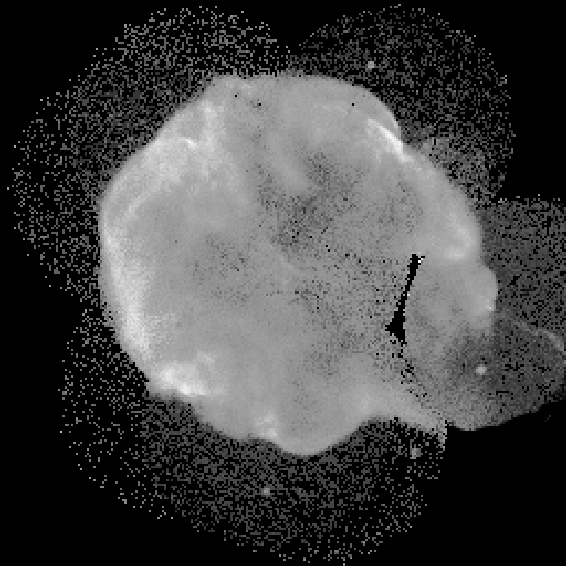

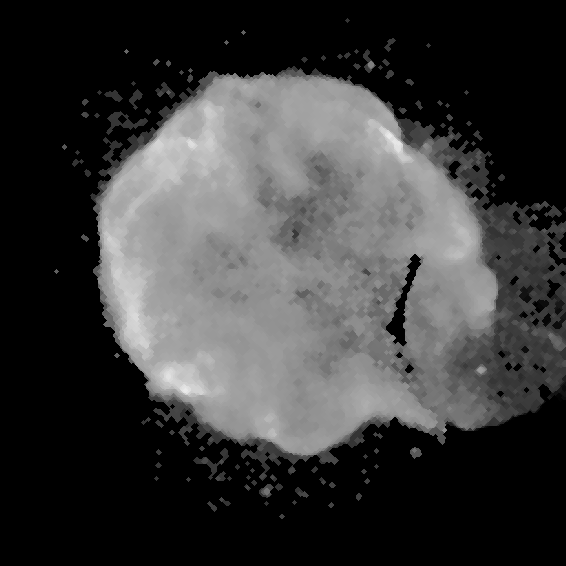

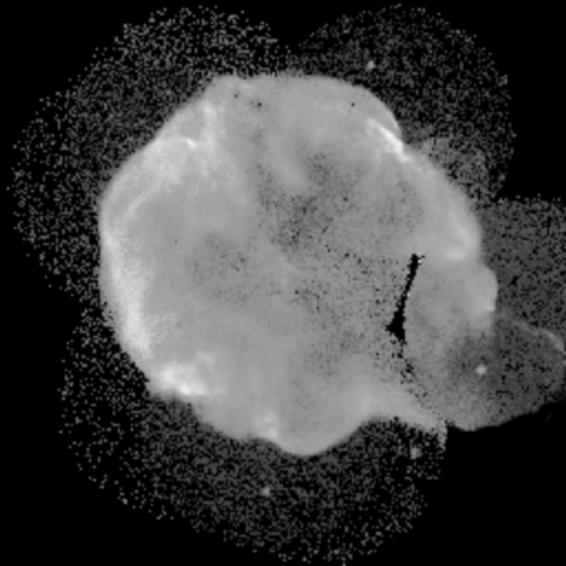

In [11]:
img = cv.imread('Fig0938(a)(cygnusloop_Xray_original).tif')

se = np.array(
    [[0, 0, 1, 0, 0],
     [0, 1, 1, 1, 0],
     [1, 1, 1, 1, 1],
     [0, 1, 1, 1, 0],
     [0, 0, 1, 0, 0]], dtype= np.uint8
)

opening = cv.dilate(cv.erode(img, se, iterations= 1), se, iterations= 1)
morphological_smoothing = cv.erode(cv.dilate(opening, se, iterations= 1), se, iterations= 1)

gaussianBlur = cv.GaussianBlur(img, ksize= (5, 5), sigmaX = 0)

cv2_imshow(img)
cv2_imshow(morphological_smoothing)
cv2_imshow(gaussianBlur)

# HW#2-9

## 이미지 번호 순서
a
<br>
b
<br>
c
<br>
d

## 이미지 a
원본 이미지

## 이미지 b
Otsu 알고리즘을 통해 원본 이미지를 이진화한 이미지이다. 좌측 상단에 노이즈가 약간 남아있다.

## 이미지 c
이미지 d의 히스토그램에서 계곡 지점을 찾아 임계값 T를 140으로 설정하고 이진화한 이미지이다. Otsu 알고리즘을 통해 이진화한 이미지와 달리 좌측 상단에 노이즈가 훨씬 적지만 우측 하단에 객체가 약간 갈라져있다.

## 이미지 d
원본 이미지의 명암 단계별 화소의 발생 빈도를 나타내는 히스토그램

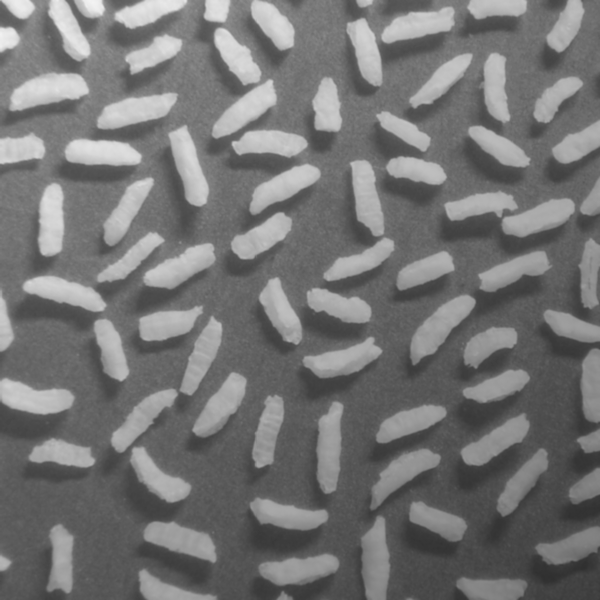

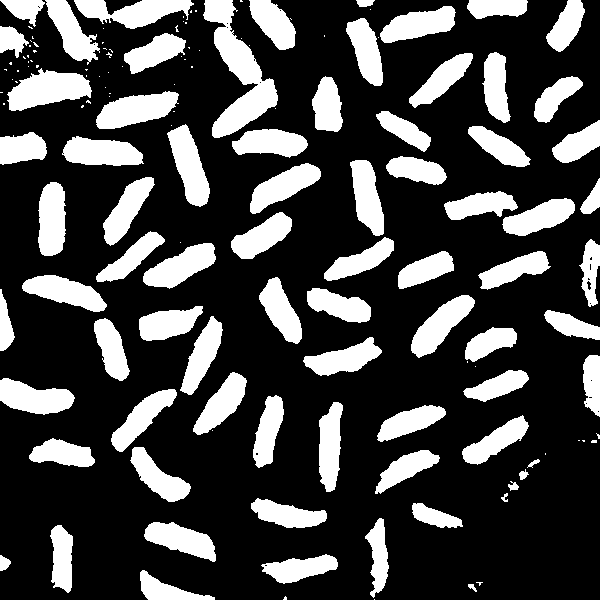

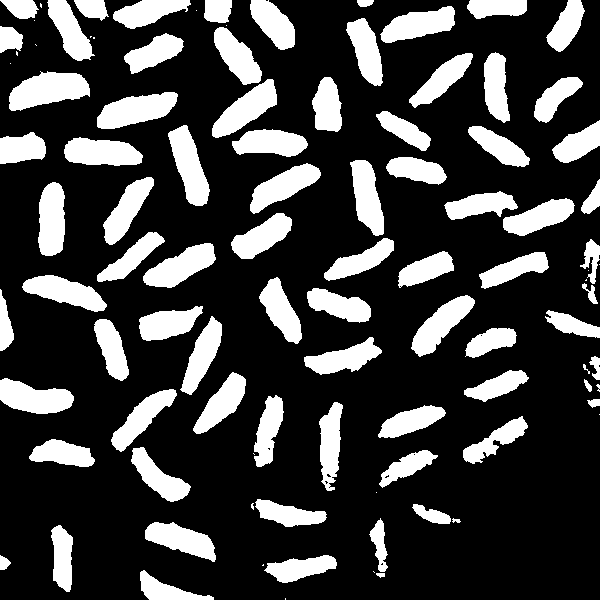

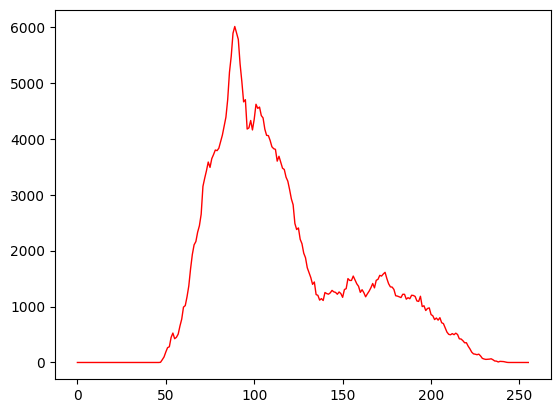

In [16]:
img = cv.imread('Fig0940(a)(rice_image_with_intensity_gradient).tif')
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

h = cv.calcHist([img_gray], [0], None, [256], [0, 255])
plt.plot(h, color='r', linewidth= 1)

t, otsu = cv.threshold(img_gray, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)
_, thresh = cv.threshold(img_gray, 140, 255, cv.THRESH_BINARY)

cv2_imshow(img_gray)
cv2_imshow(otsu)
cv2_imshow(thresh)

# HW#2-10

## 개요
아래의 이미지들은 Morphology를 적용하여 분할한 이미지들이다.

## 이미지 번호 순서
a
<br>
b
<br>
c
<br>
d

## 이미지 a
원본 이미지

## 이미지 b
원본 이미지에서 closing 연산을 통해 왼쪽에 있는 작은 얼룩을 제거한 이미지이다.

## 이미지 c
이미지 b에서 opening 연산을 통해 얼룩들 간의 밝은 패치를 제거한 이미지이다.

## 이미지 d
이미지 c에서 형태학적 기울기 연산을 통해 경계를 추출한 이미지이다.

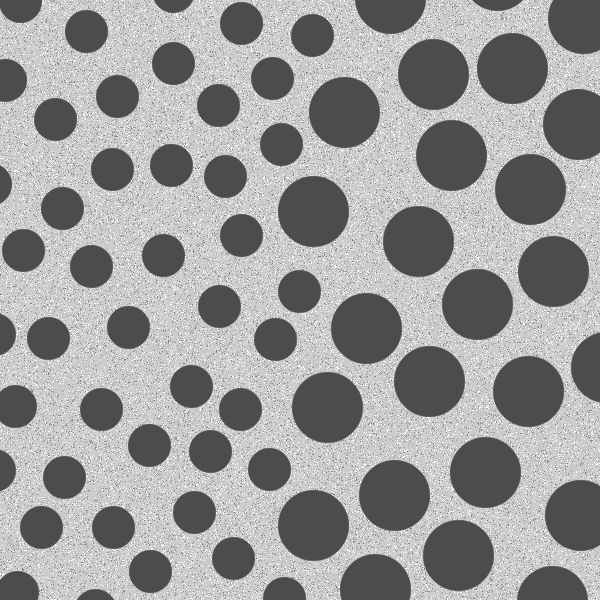

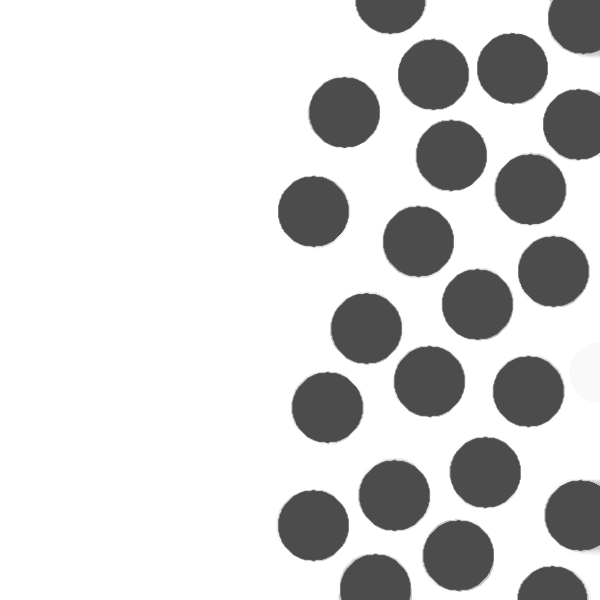

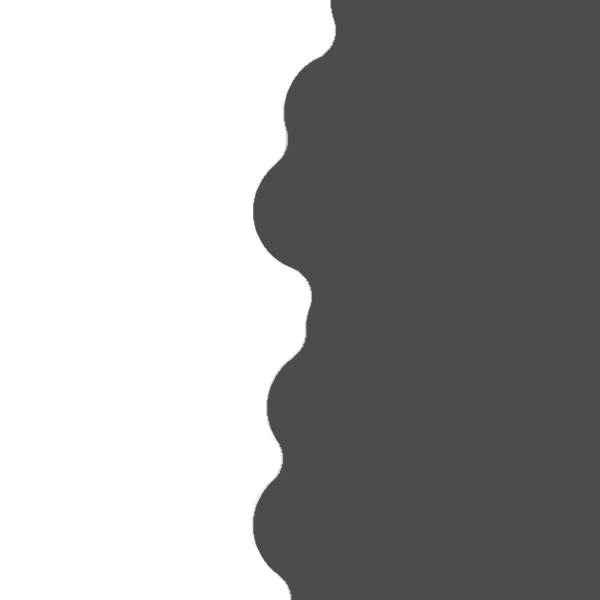

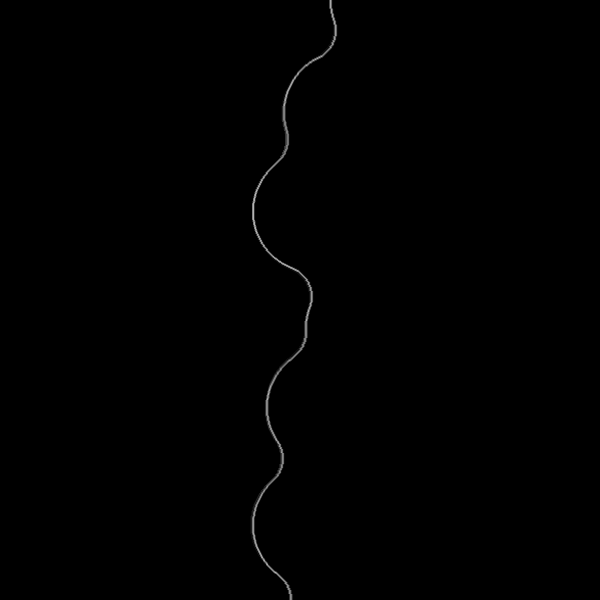

In [89]:
img = cv.imread('Fig0943(a)(dark_blobs_on_light_background).tif')

se1 = cv.getStructuringElement(cv.MORPH_ELLIPSE, (61, 61))
se2 = cv.getStructuringElement(cv.MORPH_ELLIPSE, (111, 111))
se3 = cv.getStructuringElement(cv.MORPH_ELLIPSE, (3, 3))

closing = cv.erode(cv.dilate(img, se1, iterations= 1), se1, iterations= 1)
opening = cv.dilate(cv.erode(closing, se2, iterations= 1), se1, iterations= 1)
mophological_gradient = cv.dilate(opening, se3, iterations= 1) - cv.erode(opening, se3, iterations= 1)

cv2_imshow(img)
cv2_imshow(closing)
cv2_imshow(opening)
cv2_imshow(mophological_gradient)